In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
data = pd.read_csv("NewspaperData.csv")
print(data)

                         Newspaper     daily    sunday
0                    Baltimore Sun   391.952   488.506
1                     Boston Globe   516.981   798.298
2                    Boston Herald   355.628   235.084
3               Charlotte Observer   238.555   299.451
4                Chicago Sun Times   537.780   559.093
5                  Chicago Tribune   733.775  1133.249
6              Cincinnati Enquirer   198.832   348.744
7                      Denver Post   252.624   417.779
8              Des Moines Register   206.204   344.522
9                 Hartford Courant   231.177   323.084
10               Houston Chronicle   449.755   620.752
11                Kansas City Star   288.571   423.305
12         Los Angeles Daily  News   185.736   202.614
13               Los Angeles Times  1164.388  1531.527
14                    Miami Herald   444.581   553.479
15        Minneapolis Star Tribune   412.871   685.975
16      New Orleans Times-Picayune   272.280   324.241
17        

In [5]:
data.isnull().sum()

Newspaper    0
daily        0
sunday       0
dtype: int64

In [7]:
data.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


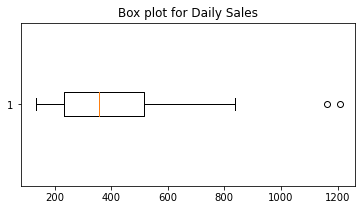

In [11]:
plt.figure(figsize=(6,3))
plt.title("Box plot for Daily Sales")
plt.boxplot(data["daily"], vert = False)
plt.show()

In [12]:
sns.hist

AttributeError: module 'seaborn' has no attribute 'hist'

Obsevations
- There are no missing values
- The daily column values appear to be right-skewed
- The sunday column values also appear to be right-skewed
- There are two outliers in both daily column and also in sunday column as observed from the boxplots

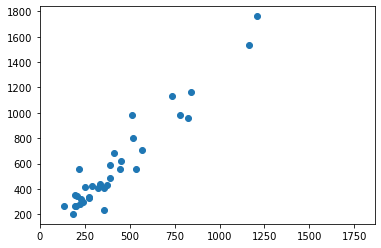

In [13]:
x= data["daily"]
y= data["sunday"]
plt.scatter(data["daily"],data["sunday"])
plt.xlim(0,max(x) +100)
plt.xlim(0,max(y) +100)
plt.show()

In [14]:
data["daily"].corr(data["sunday"])

0.9581543140785462

In [15]:
data[["daily","sunday"]].corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


Observation
- There relation between x (daily and y (sunday) is seen to be linear as seen from scatter plot
- The correlation is strong positive with Pearsons correlation of cofficient of 0.958154

In [17]:
import statsmodels.formula.api as smf
model1 = smf.ols("sunday~daily",data = data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           6.02e-19
Time:                        10:29:06   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""